In [1]:
%matplotlib inline

import os
from market_profile import MarketProfile
from google_finance import *

Load google finance data from filesystem, or download and save locally

In [2]:
if not os.path.exists('google.txt'):
    get_google_data('google.txt', 'GOOG', 60 * 30, 5)
    
df = read_google_data('google.txt')

Create the MarketProfile based on the dataframe of Google Finance data (OHLCV)

In [3]:
mp = MarketProfile(df, tick_size=1)
mp_slice = mp[df.index.max() - pd.Timedelta(6.5, 'h'):df.index.max()]

Show a nice plot of the calculated profile

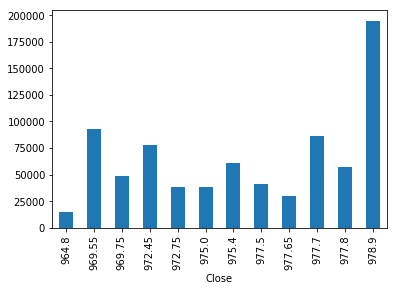

In [4]:
data = mp_slice.profile
data.plot(kind='bar')

Show some of the indicators that were calculated from the profile above

In [5]:
print "Initial balance: %f, %f" % mp_slice.initial_balance()
print "Opening range: %f, %f" % mp_slice.open_range()
print "POC: %f" % mp_slice.poc_price
print "Profile range: %f, %f" % mp_slice.profile_range
print "Value area: %f, %f" % mp_slice.value_area
print "Balanced Target: %f" % mp_slice.balanced_target

Initial balance: 963.360000, 972.540000
Opening range: 964.000000, 966.740000
POC: 978.900000
Profile range: 964.800000, 978.900000
Value area: 972.750000, 978.900000
Balanced Target: 993.000000
